C:\Users\Jonas Pielmeier\AppData\Local\Temp\ipykernel_15332\2191391439.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


count    1257.000000
mean        0.000983
std         0.019940
min        -0.137708
25%        -0.008460
50%         0.001186
75%         0.011918
max         0.113157
Name: log_ret, dtype: float64
Skewness: -0.11245686387657054
Kurtosis: 5.3833493087934965


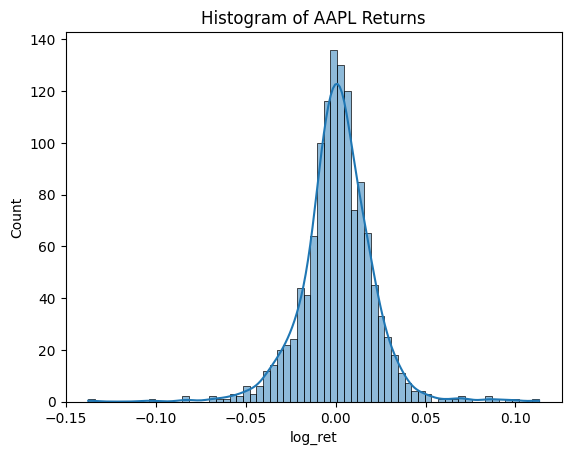

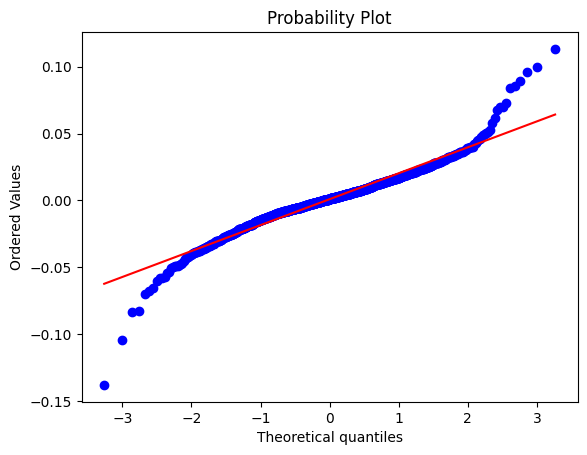

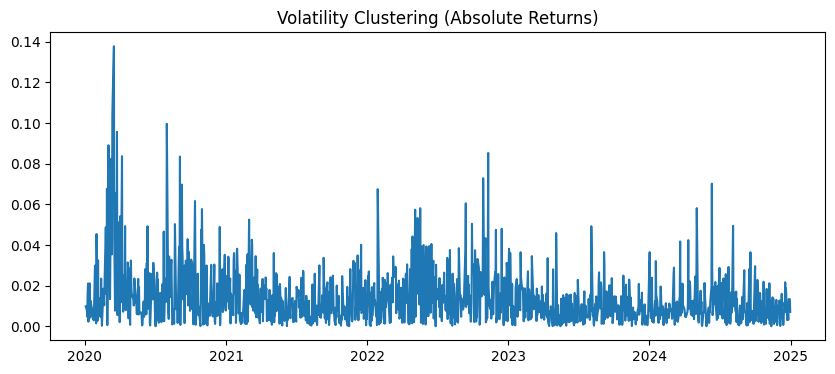

In [ ]:
# 📘 01_returns_and_distributions.ipynb
# Goal: Load market data, compute returns, and analyze distributions

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# --- 1. Load data ---
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
## Then cleans the data and compute log returns
''' The log return is defined as the natural logarithm of the ratio of consecutive closing prices. 
dropna is used to remove any resulting N/A values from the calculation.'''
data["log_ret"] = np.log(data["Close"] / data["Close"].shift(1)).dropna()

# --- 2. Basic stats ---
print(data["log_ret"].describe())
print("Skewness:", data["log_ret"].skew())
print("Kurtosis:", data["log_ret"].kurtosis())

# --- 3. Plot histogram + QQ plot ---
'''The kde is a kernel density estimate, which provides a smoothed version of the histogram.'''
sns.histplot(data["log_ret"], kde=True)

'''the f in the below title stands for formatted string literals, which allows embedding expressions inside string literals, using curly braces {}.'''
plt.title(f"Histogram of {ticker} Returns")
plt.show()


stats.probplot(data["log_ret"].dropna(), dist="norm", plot=plt)
plt.show()

# --- 4. Volatility clustering ---
plt.figure(figsize=(10,4))
plt.plot(np.abs(data["log_ret"]))
plt.title("Volatility Clustering (Absolute Returns)")
plt.show()


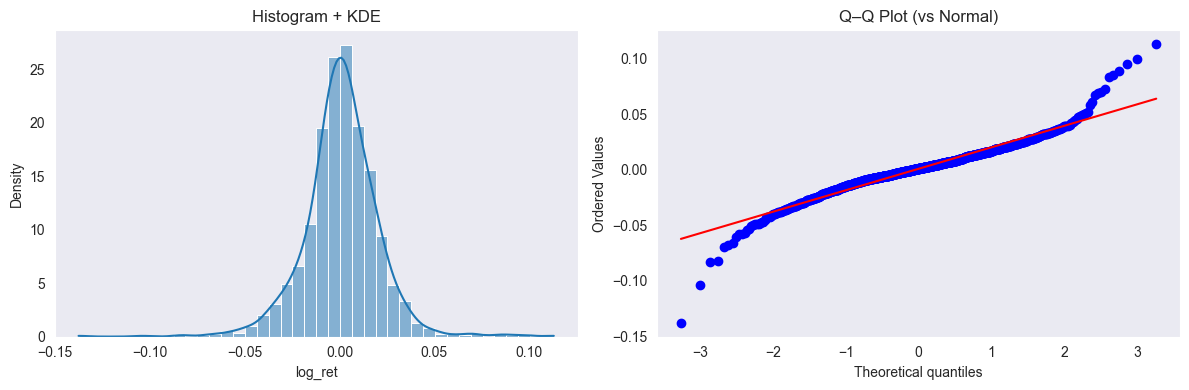

In [ ]:
#This is using seaborn instead of just matplotlib for better styling as an alternative 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

y = data["log_ret"].dropna()

# Set up the figure with two subplots
sns.set_style("darkgrid")            # optional seaborn styling
fig, (ax_hist, ax_qq) = plt.subplots(1, 2, figsize=(12, 4))

# histogram + KDE using seaborn on ax_hist
sns.histplot(y, kde=True, stat="density", bins=40, ax=ax_hist)
ax_hist.set_title("Histogram + KDE")

# QQ plot using SciPy drawn onto ax_qq (a Matplotlib Axes)
stats.probplot(y, dist="norm", plot=ax_qq)
ax_qq.set_title("Q–Q Plot (vs Normal)")

plt.tight_layout()
plt.show()